In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_equations import get_stationary

In [29]:
I_0 = 300.0

tmax = 300

zmax=15
dz=0.1
z_grid = np.arange(0,zmax,dz) # make sure get_stationary has dz=0.1
Nz=len(z_grid)

dmax = 10
dmin = 0.1
dstep = 0.5
drange=dmax-dmin
d_vals=np.arange(dmin,dmax,dstep)
Nd = len(d_vals)

In [30]:
d_vals.shape

(20,)

In [31]:
stationary_A = np.zeros((Nz,Nd)) 
stationary_Rb = np.zeros((Nz,Nd))
stationary_Rd = np.zeros((Nz,Nd))
stationary_Rs = np.zeros(Nd)

In [ ]:
# https://github.com/kuk/log-progress/blob/master/README.md progress bar
i=0
import progress_bar
for d in progress_bar.log_progress(d_vals, every=1):
    print(d)
    stationary_A[:,i], stationary_Rb[:,i], stationary_Rd[:,i], stationary_Rs[i] = get_stationary(zmax=zmax,tmax=tmax, d=d, I0=I_0, dz=dz)
    i += 1

0.1


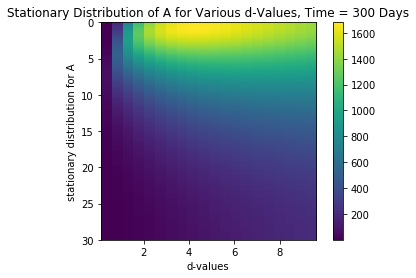

In [14]:
# Heatmap
plt.imshow(stationary_A[:,:],aspect=d/zmax,origin="lower",extent=(dmin,d,0,zmax))
plt.xlabel('d-values')
plt.ylabel('stationary distribution for A')
plt.title('Stationary Distribution of A for Various d-Values, Time = {} Days'.format(tmax))
plt.gca().invert_yaxis()
plt.colorbar()

In [23]:
z_grid = np.arange(0,int(zmax/dz))

In [27]:
2/dstep

4.0

<IPython.core.display.Javascript object>


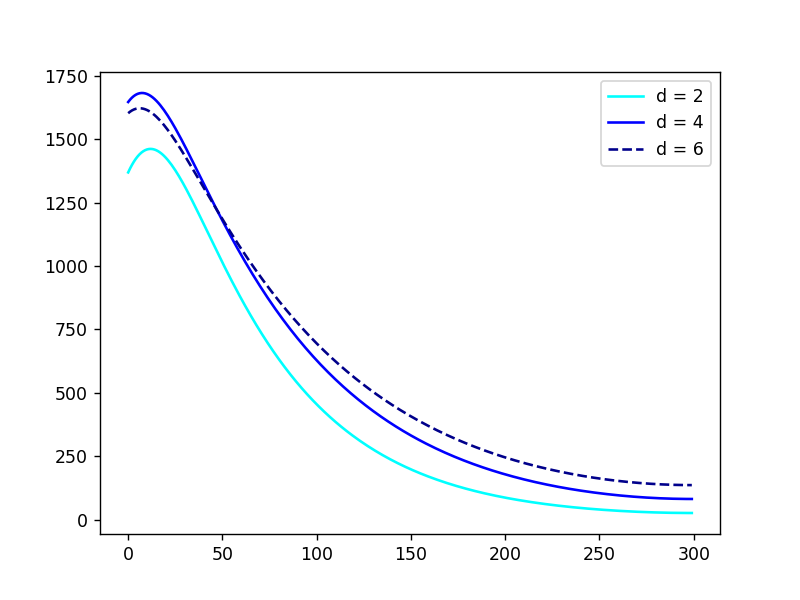

C:\Users\aliso\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  import sys


In [28]:
first = 2
second = 4
third = 6
plt.plot(z_grid,stationary_A[:,int(first/dstep)],color='aqua')
plt.plot(z_grid,stationary_A[:,int(second/dstep)],color='blue')
plt.plot(z_grid,stationary_A[:,int(third/dstep)],color='darkblue',linestyle='--')
plt.legend('best',labels=('d = {}'.format(first),'d = {}'.format(second),'d = {}'.format(third)))

<IPython.core.display.Javascript object>


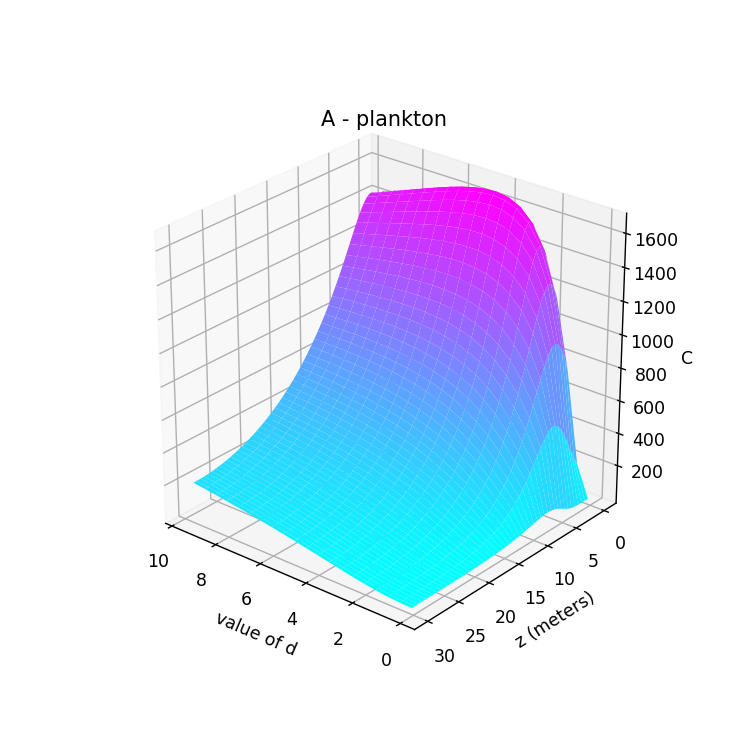

Text(0.5, 0.92, 'A - plankton')

In [15]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

D,Z = np.meshgrid(d_vals,z_grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(D,Z, stationary_A, cmap='cool')
ax.set_xlabel('value of d')
ax.set_ylabel('z (meters)')
ax.set_zlabel('C')
ax.set_title('A - plankton')

In [34]:
# save everything to results dataframes to save repeating
pd.DataFrame(stationary_A).to_csv("A_dz.csv")
pd.DataFrame(stationary_Rb).to_csv("Rb_dz.csv")
pd.DataFrame(stationary_Rd).to_csv("Rd_dz.csv")
pd.DataFrame(stationary_Rs).to_csv("Rs_dz.csv")